# Lending club Case Study

In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv file from the location
loan=pd.read_csv("loan2.csv")

C:\Users\neoke\AppData\Local\Temp\ipykernel_34364\1108133348.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan=pd.read_csv("loan2.csv")


In [3]:
#See the dimensions of the file and first 5 rows and the columns of the csv file
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
loan.shape

(39717, 111)

# Cleaning Data

In [5]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Removing columns with all Null values
loan.dropna(axis=1, how = 'all', inplace =True)

In [8]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

In [9]:
# find out columsn with single values,and then they can be removed
single_valued_columns = loan.columns[loan.nunique() == 1]
single_valued_columns_list = single_valued_columns.tolist()
print(single_valued_columns_list)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


loan.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],  axis = 1, inplace = True)

In [12]:
loan.shape


(39717, 48)

In [13]:
# verifying columns again and analyzing the data
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [15]:
# There are lot of columns that doesnt contribute to our analysis, like id, member_id, url, title, emp_title, zip_code, last_credit_pull_d, etc.
# we are gonna drop those columns that doesnt contribute much to our analysis.
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [16]:
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
loan.shape

(39717, 22)

In [18]:
loan.head()

loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0       5000           4975.0   36 months   10.65%       162.87     B   
1       2500           2500.0   60 months   15.27%        59.83     C   
2       2400           2400.0   36 months   15.96%        84.33     C   
3      10000          10000.0   36 months   13.49%       339.31     C   
4       3000           3000.0   60 months   12.69%        67.79     B   

  sub_grade emp_length home_ownership  annual_inc  ...  loan_status  \
0        B2  10+ years           RENT     24000.0  ...   Fully Paid   
1        C4   < 1 year           RENT     30000.0  ...  Charged Off   
2        C5  10+ years           RENT     12252.0  ...   Fully Paid   
3        C1  10+ years           RENT     49200.0  ...   Fully Paid   
4        B5     1 year           RENT     80000.0  ...      Current   

          purpose    dti earliest_cr_line  inq_last_6mths open_acc  pub_rec  \
0     credit_card  27.65           Jan-85               1        3        0   
1             car   1.00           Apr-99               5        3        0   
2  small_business   8.72           Nov-01               2        2        0   
3           other  20.00           Feb-96               1       10        0   
4           other  17.94           Jan-96               0       15        0   

   revol_util  total_acc pub_rec_bankruptcies  
0      83.70%          9                  0.0  
1       9.40%          4                  0.0  
2      98.50%         10                  0.0  
3         21%         37                  0.0  
4      53.90%         38                  0.0  

[5 rows x 22 columns]

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  dti                   39717 non-null  float64
 15  earliest_cr_line   

In [24]:
loan.drop(['pub_rec_bankruptcies'], axis=1, inplace =True)

C:\Users\neoke\AppData\Local\Temp\ipykernel_34364\329614614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.drop(['pub_rec_bankruptcies'], axis=1, inplace =True)


In [25]:
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [21]:
#We cannot make anything up for the current loans. so it is best to exclude it
loan= loan[loan.loan_status!="Current"]

In [26]:
loan.shape

(38577, 21)

In [22]:
#verify loan status
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [132]:
#To see how many loan status values we have after eliminating current loans
loan['loan_status'].value_counts()

Fully Paid     31204
Charged Off     5402
Name: loan_status, dtype: int64

In [133]:
#To see what are the different interest rates
loan['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [135]:
#If the income of the borrower is verified or not, if the source of income is verified or not
loan['verification_status'].value_counts()

Not Verified       16253
Verified           11209
Source Verified     9144
Name: verification_status, dtype: int64

In [136]:
#The month,year which the loan was funded, to see if the format is good for analysis
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

###  checking for missin values percentages


In [29]:
##checking for missin values percentages
(loan.isna().sum()/len(loan.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

In [30]:
#handling missing values
#columns with missing values are "emp_length", "revol_util".

In [31]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [33]:
# emp_length, calculate mode
loan.emp_length.mode()[0]


'10+ years'

In [34]:
#value counts for emp_length
loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [35]:
#The above value counts show that mode value has higher frequency, we can safely assign mode value to emp_length
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)


C:\Users\neoke\AppData\Local\Temp\ipykernel_34364\2919390662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)


In [36]:
#verification of emp_lenth
loan.emp_length.isna().sum()

0

In [37]:
#missing values are less for revol_util, we can drop missing values
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()

C:\Users\neoke\AppData\Local\Temp\ipykernel_34364\1921258975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


0

In [38]:
loan.columns


Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [39]:
loan.shape

(38527, 21)

In [40]:
loan.head()

loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0       5000           4975.0   36 months   10.65%       162.87     B   
1       2500           2500.0   60 months   15.27%        59.83     C   
2       2400           2400.0   36 months   15.96%        84.33     C   
3      10000          10000.0   36 months   13.49%       339.31     C   
5       5000           5000.0   36 months    7.90%       156.46     A   

  sub_grade emp_length home_ownership  annual_inc  ... issue_d  loan_status  \
0        B2  10+ years           RENT     24000.0  ...  Dec-11   Fully Paid   
1        C4   < 1 year           RENT     30000.0  ...  Dec-11  Charged Off   
2        C5  10+ years           RENT     12252.0  ...  Dec-11   Fully Paid   
3        C1  10+ years           RENT     49200.0  ...  Dec-11   Fully Paid   
5        A4    3 years           RENT     36000.0  ...  Dec-11   Fully Paid   

          purpose    dti  earliest_cr_line inq_last_6mths  open_acc  pub_rec  \
0     credit_card  27.65            Jan-85              1         3        0   
1             car   1.00            Apr-99              5         3        0   
2  small_business   8.72            Nov-01              2         2        0   
3           other  20.00            Feb-96              1        10        0   
5         wedding  11.20            Nov-04              3         9        0   

   revol_util total_acc  
0      83.70%         9  
1       9.40%         4  
2      98.50%        10  
3         21%        37  
5      28.30%        12  

[5 rows x 21 columns]

In [41]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
loan.head(10)

loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0        5000           4975.0   36 months   10.65%       162.87     B   
1        2500           2500.0   60 months   15.27%        59.83     C   
2        2400           2400.0   36 months   15.96%        84.33     C   
3       10000          10000.0   36 months   13.49%       339.31     C   
5        5000           5000.0   36 months    7.90%       156.46     A   
6        7000           7000.0   60 months   15.96%       170.08     C   
7        3000           3000.0   36 months   18.64%       109.43     E   
8        5600           5600.0   60 months   21.28%       152.39     F   
9        5375           5350.0   60 months   12.69%       121.45     B   
10       6500           6500.0   60 months   14.65%       153.45     C   

   sub_grade emp_length home_ownership  annual_inc verification_status  \
0         B2  10+ years           RENT     24000.0            Verified   
1         C4   < 1 year           RENT     30000.0     Source Verified   
2         C5  10+ years           RENT     12252.0        Not Verified   
3         C1  10+ years           RENT     49200.0     Source Verified   
5         A4    3 years           RENT     36000.0     Source Verified   
6         C5    8 years           RENT     47004.0        Not Verified   
7         E1    9 years           RENT     48000.0     Source Verified   
8         F2    4 years            OWN     40000.0     Source Verified   
9         B5   < 1 year           RENT     15000.0            Verified   
10        C3    5 years            OWN     72000.0        Not Verified   

   issue_d  loan_status             purpose    dti earliest_cr_line  \
0   Dec-11   Fully Paid         credit_card  27.65           Jan-85   
1   Dec-11  Charged Off                 car   1.00           Apr-99   
2   Dec-11   Fully Paid      small_business   8.72           Nov-01   
3   Dec-11   Fully Paid               other  20.00           Feb-96   
5   Dec-11   Fully Paid             wedding  11.20           Nov-04   
6   Dec-11   Fully Paid  debt_consolidation  23.51           Jul-05   
7   Dec-11   Fully Paid                 car   5.35           Jan-07   
8   Dec-11  Charged Off      small_business   5.55           Apr-04   
9   Dec-11  Charged Off               other  18.08           Sep-04   
10  Dec-11   Fully Paid  debt_consolidation  16.12           Jan-98   

    inq_last_6mths  open_acc  pub_rec revol_util  total_acc  
0                1         3        0     83.70%          9  
1                5         3        0      9.40%          4  
2                2         2        0     98.50%         10  
3                1        10        0        21%         37  
5                3         9        0     28.30%         12  
6                1         7        0     85.60%         11  
7                2         4        0     87.50%          4  
8                2        11        0     32.60%         13  
9                0         2        0     36.50%          3  
10               2        14        0     20.60%         23

In [42]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  object 
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null 

## Standardizing the Data
> revol_util and int_rate columns has continious values, need to standardize the date
> "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
> Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable.

In [48]:
loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : x.split('%')[0]))

C:\Users\neoke\AppData\Local\Temp\ipykernel_34364\3915761440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : x.split('%')[0]))


In [49]:
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))

C:\Users\neoke\AppData\Local\Temp\ipykernel_34364\3079871057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))


In [50]:
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

C:\Users\neoke\AppData\Local\Temp\ipykernel_34364\4282855238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [51]:
loan.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0       5000           4975.0   36 months     10.65       162.87     B   
1       2500           2500.0   60 months     15.27        59.83     C   
2       2400           2400.0   36 months     15.96        84.33     C   
3      10000          10000.0   36 months     13.49       339.31     C   
5       5000           5000.0   36 months      7.90       156.46     A   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           0           RENT     30000.0     Source Verified   
2        C5          10           RENT     12252.0        Not Verified   
3        C1          10           RENT     49200.0     Source Verified   
5        A4           3           RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose    dti earliest_cr_line  \
0  Dec-11   Fully Paid     credit_card  27.65           Jan-85   
1  Dec-11  Charged Off             car   1.00           Apr-99   
2  Dec-11   Fully Paid  small_business   8.72           Nov-01   
3  Dec-11   Fully Paid           other  20.00           Feb-96   
5  Dec-11   Fully Paid         wedding  11.20           Nov-04   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  
0               1         3        0        83.7          9  
1               5         3        0         9.4          4  
2               2         2        0        98.5         10  
3               1        10        0        21.0         37  
5               3         9        0        28.3         12

In [52]:
loan.head(20)

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0        5000       4975.00000   36 months     10.65       162.87     B   
1        2500       2500.00000   60 months     15.27        59.83     C   
2        2400       2400.00000   36 months     15.96        84.33     C   
3       10000      10000.00000   36 months     13.49       339.31     C   
5        5000       5000.00000   36 months      7.90       156.46     A   
6        7000       7000.00000   60 months     15.96       170.08     C   
7        3000       3000.00000   36 months     18.64       109.43     E   
8        5600       5600.00000   60 months     21.28       152.39     F   
9        5375       5350.00000   60 months     12.69       121.45     B   
10       6500       6500.00000   60 months     14.65       153.45     C   
11      12000      12000.00000   36 months     12.69       402.54     B   
12       9000       9000.00000   36 months     13.49       305.38     C   
13       3000       3000.00000   36 months      9.91        96.68     B   
14      10000      10000.00000   36 months     10.65       325.74     B   
15       1000       1000.00000   36 months     16.29        35.31     D   
16      10000      10000.00000   36 months     15.27       347.98     C   
17       3600       3600.00000   36 months      6.03       109.57     A   
18       6000       6000.00000   36 months     11.71       198.46     B   
19       9200       9200.00000   36 months      6.03       280.01     A   
20      20250      19142.16108   60 months     15.27       484.63     C   

   sub_grade  emp_length home_ownership  annual_inc verification_status  \
0         B2          10           RENT    24000.00            Verified   
1         C4           0           RENT    30000.00     Source Verified   
2         C5          10           RENT    12252.00        Not Verified   
3         C1          10           RENT    49200.00     Source Verified   
5         A4           3           RENT    36000.00     Source Verified   
6         C5           8           RENT    47004.00        Not Verified   
7         E1           9           RENT    48000.00     Source Verified   
8         F2           4            OWN    40000.00     Source Verified   
9         B5           0           RENT    15000.00            Verified   
10        C3           5            OWN    72000.00        Not Verified   
11        B5          10            OWN    75000.00     Source Verified   
12        C1           0           RENT    30000.00     Source Verified   
13        B1           3           RENT    15000.00     Source Verified   
14        B2           3           RENT   100000.00     Source Verified   
15        D1           0           RENT    28000.00        Not Verified   
16        C4           4           RENT    42000.00        Not Verified   
17        A1          10       MORTGAGE   110000.00        Not Verified   
18        B3           1       MORTGAGE    84000.00            Verified   
19        A1           6           RENT    77385.19        Not Verified   
20        C4           3           RENT    43370.00            Verified   

   issue_d  loan_status             purpose    dti earliest_cr_line  \
0   Dec-11   Fully Paid         credit_card  27.65           Jan-85   
1   Dec-11  Charged Off                 car   1.00           Apr-99   
2   Dec-11   Fully Paid      small_business   8.72           Nov-01   
3   Dec-11   Fully Paid               other  20.00           Feb-96   
5   Dec-11   Fully Paid             wedding  11.20           Nov-04   
6   Dec-11   Fully Paid  debt_consolidation  23.51           Jul-05   
7   Dec-11   Fully Paid                 car   5.35           Jan-07   
8   Dec-11  Charged Off      small_business   5.55           Apr-04   
9   Dec-11  Charged Off               other  18.08           Sep-04   
10  Dec-11   Fully Paid  debt_consolidation  16.12           Jan-98   
11  Dec-11   Fully Paid  debt_consolidation  10.78           Oct-89   


# Checking for outliers



In [53]:
# checking outliers for  annual_inc column

<Axes: >

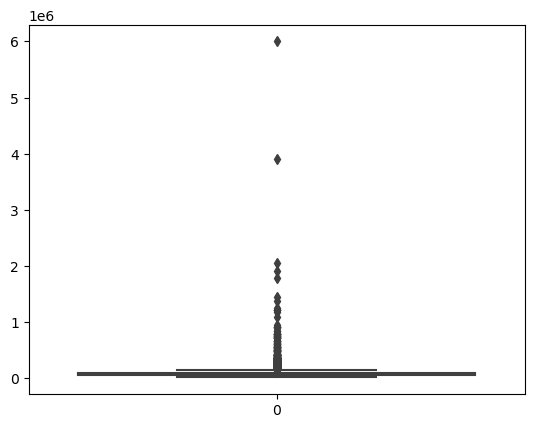

In [54]:
sns.boxplot(loan['annual_inc'])

In [55]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [56]:
#The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
#So, considering threshold for removing outliers as 0.95
annual_inc_95 = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= annual_inc_95]

<Axes: >

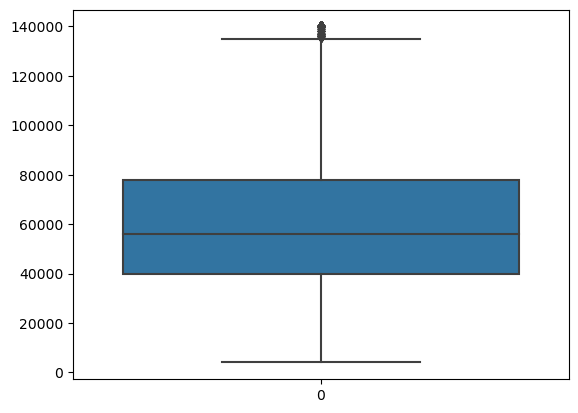

In [57]:
sns.boxplot(loan.annual_inc)

<Axes: >

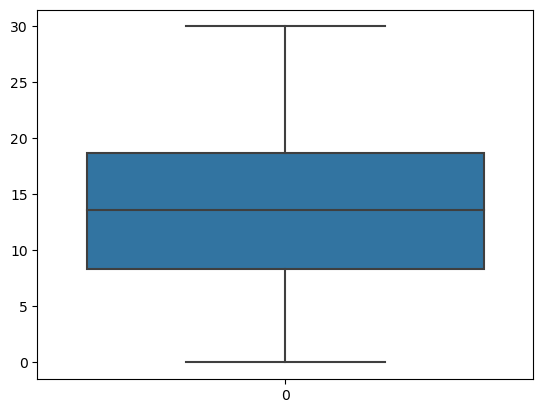

In [58]:
#lets analyse outliers for other numerical values 
# dti
#loan_amnt
#funded_amnt_inv

sns.boxplot(loan.dti)

<Axes: >

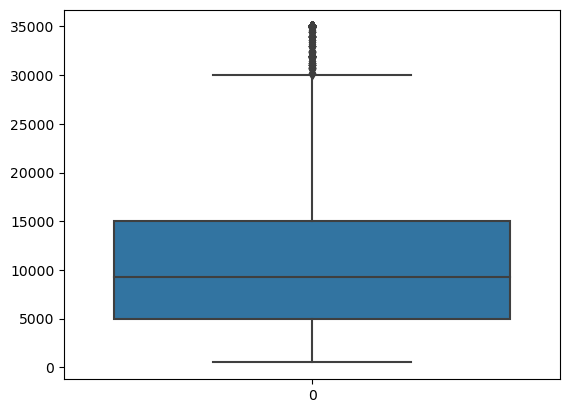

In [59]:
sns.boxplot(loan.loan_amnt)

In [60]:

loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

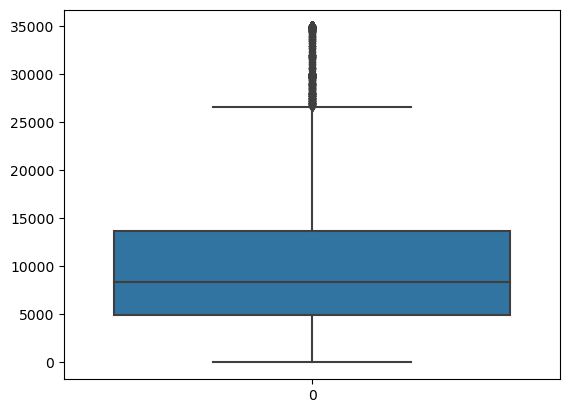

In [61]:
sns.boxplot(loan.funded_amnt_inv)

In [62]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

In [63]:
# Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

In [64]:
loan.head(20
        )

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0        5000       4975.00000   36 months     10.65       162.87     B   
1        2500       2500.00000   60 months     15.27        59.83     C   
2        2400       2400.00000   36 months     15.96        84.33     C   
3       10000      10000.00000   36 months     13.49       339.31     C   
5        5000       5000.00000   36 months      7.90       156.46     A   
6        7000       7000.00000   60 months     15.96       170.08     C   
7        3000       3000.00000   36 months     18.64       109.43     E   
8        5600       5600.00000   60 months     21.28       152.39     F   
9        5375       5350.00000   60 months     12.69       121.45     B   
10       6500       6500.00000   60 months     14.65       153.45     C   
11      12000      12000.00000   36 months     12.69       402.54     B   
12       9000       9000.00000   36 months     13.49       305.38     C   
13       3000       3000.00000   36 months      9.91        96.68     B   
14      10000      10000.00000   36 months     10.65       325.74     B   
15       1000       1000.00000   36 months     16.29        35.31     D   
16      10000      10000.00000   36 months     15.27       347.98     C   
17       3600       3600.00000   36 months      6.03       109.57     A   
18       6000       6000.00000   36 months     11.71       198.46     B   
19       9200       9200.00000   36 months      6.03       280.01     A   
20      20250      19142.16108   60 months     15.27       484.63     C   

   sub_grade  emp_length home_ownership  annual_inc verification_status  \
0         B2          10           RENT    24000.00            Verified   
1         C4           0           RENT    30000.00     Source Verified   
2         C5          10           RENT    12252.00        Not Verified   
3         C1          10           RENT    49200.00     Source Verified   
5         A4           3           RENT    36000.00     Source Verified   
6         C5           8           RENT    47004.00        Not Verified   
7         E1           9           RENT    48000.00     Source Verified   
8         F2           4            OWN    40000.00     Source Verified   
9         B5           0           RENT    15000.00            Verified   
10        C3           5            OWN    72000.00        Not Verified   
11        B5          10            OWN    75000.00     Source Verified   
12        C1           0           RENT    30000.00     Source Verified   
13        B1           3           RENT    15000.00     Source Verified   
14        B2           3           RENT   100000.00     Source Verified   
15        D1           0           RENT    28000.00        Not Verified   
16        C4           4           RENT    42000.00        Not Verified   
17        A1          10       MORTGAGE   110000.00        Not Verified   
18        B3           1       MORTGAGE    84000.00            Verified   
19        A1           6           RENT    77385.19        Not Verified   
20        C4           3           RENT    43370.00            Verified   

   issue_d  loan_status             purpose    dti earliest_cr_line  \
0   Dec-11   Fully Paid         credit_card  27.65           Jan-85   
1   Dec-11  Charged Off                 car   1.00           Apr-99   
2   Dec-11   Fully Paid      small_business   8.72           Nov-01   
3   Dec-11   Fully Paid               other  20.00           Feb-96   
5   Dec-11   Fully Paid             wedding  11.20           Nov-04   
6   Dec-11   Fully Paid  debt_consolidation  23.51           Jul-05   
7   Dec-11   Fully Paid                 car   5.35           Jan-07   
8   Dec-11  Charged Off      small_business   5.55           Apr-04   
9   Dec-11  Charged Off               other  18.08           Sep-04   
10  Dec-11   Fully Paid  debt_consolidation  16.12           Jan-98   
11  Dec-11   Fully Paid  debt_consolidation  10.78           Oct-89   


In [65]:
loan.columns


Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [66]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36606 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36606 non-null  int64  
 1   funded_amnt_inv      36606 non-null  float64
 2   term                 36606 non-null  object 
 3   int_rate             36606 non-null  float64
 4   installment          36606 non-null  float64
 5   grade                36606 non-null  object 
 6   sub_grade            36606 non-null  object 
 7   emp_length           36606 non-null  int64  
 8   home_ownership       36606 non-null  object 
 9   annual_inc           36606 non-null  float64
 10  verification_status  36606 non-null  object 
 11  issue_d              36606 non-null  object 
 12  loan_status          36606 non-null  object 
 13  purpose              36606 non-null  object 
 14  dti                  36606 non-null  float64
 15  earliest_cr_line     36606 non-null 

# Visualizing  data



<Axes: xlabel='loan_status', ylabel='count'>

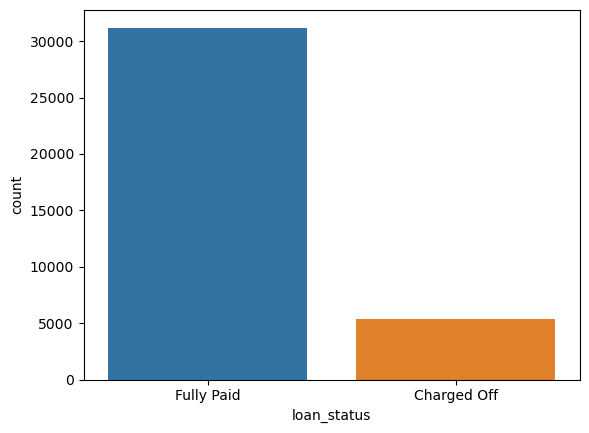

In [67]:
sns.countplot(x='loan_status', data = loan)

In [70]:
#lets check sub_grade
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head()

C:\Users\neoke\AppData\Local\Temp\ipykernel_34364\1624614363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))


0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

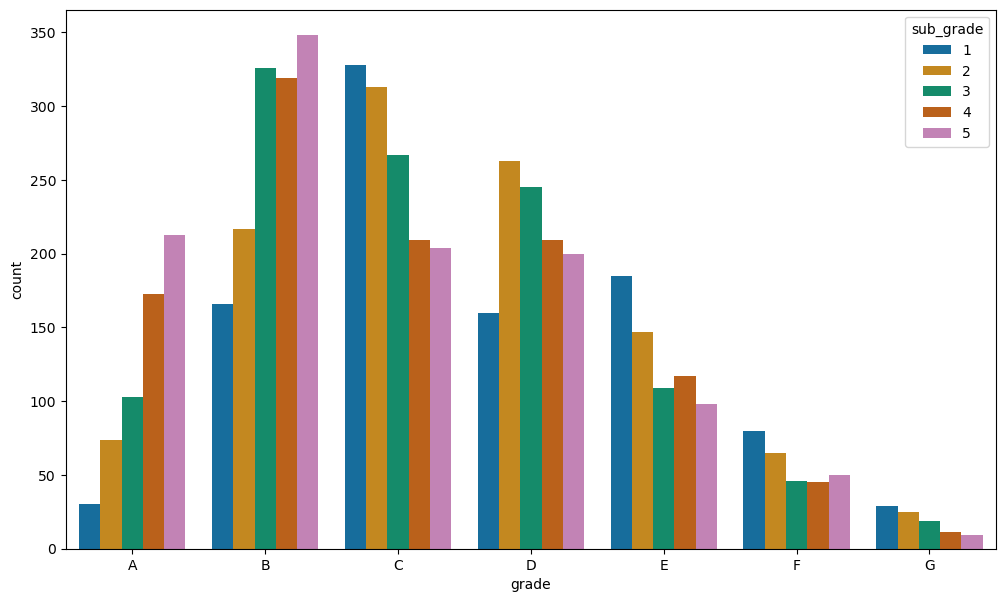

In [71]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

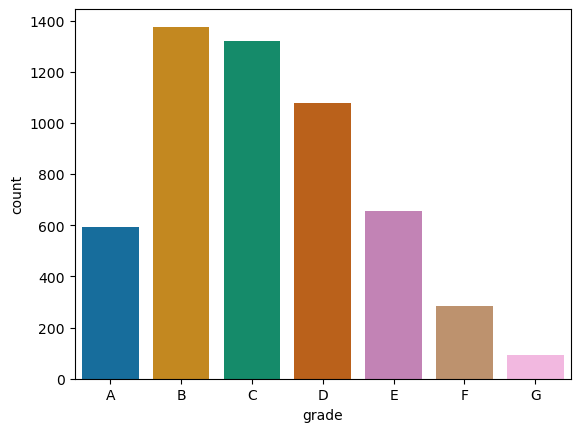

In [72]:
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [73]:
#Analysing home_ownership
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [75]:
loan['home_ownership'].describe()

count     36606
unique        5
top        RENT
freq      18000
Name: home_ownership, dtype: object

In [76]:
loan['home_ownership'].info()

<class 'pandas.core.series.Series'>
Int64Index: 36606 entries, 0 to 39716
Series name: home_ownership
Non-Null Count  Dtype 
--------------  ----- 
36606 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [78]:
loan['home_ownership'].value_counts()


RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

In [79]:
# There are only 3 occurance of NONE value. we can drop or change the value to Other. 
#lets change it to other value

In [80]:
#replacing 'NONE' with 'OTHERS'
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [81]:
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

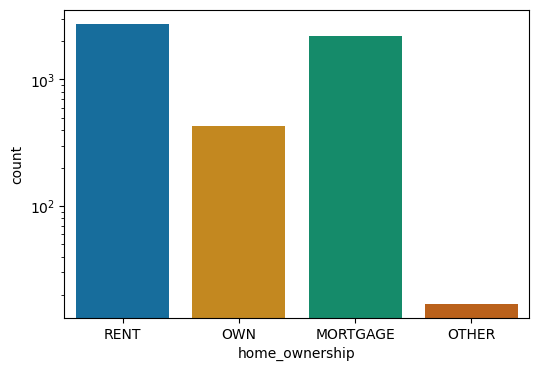

In [82]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

#### Analyzing purpose column



<Axes: xlabel='count', ylabel='purpose'>

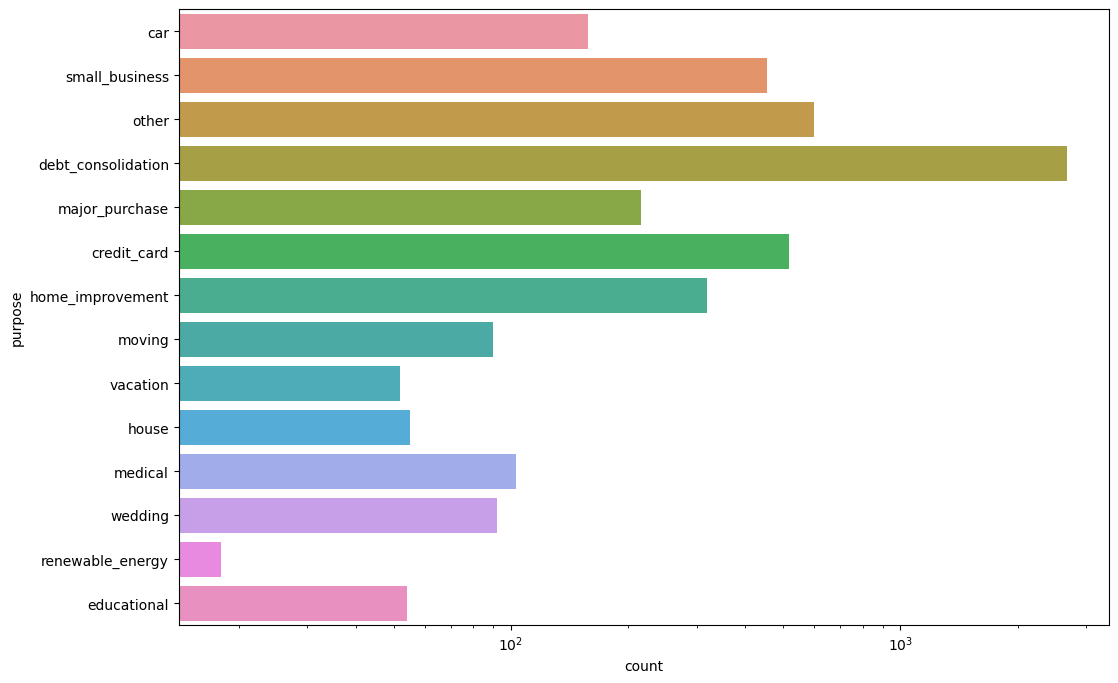

In [83]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])

In [84]:
loan.columns


Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

## Univariate Analysis

Text(0, 0.5, 'Number of Loans issued')

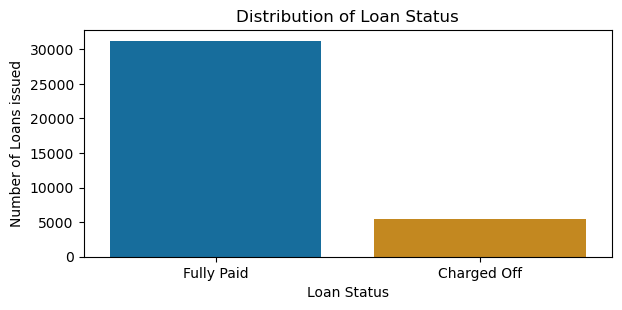

In [85]:
# Univariate Analysis on Unordered Categorical variables
plt.figure(figsize=(15,10))

plt.figure(1)

# Distribution of Loans by Status
plt.subplot(3,2,1)
sns.countplot(x='loan_status', data=loan)
plt.title('Distribution of Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")



Text(0, 0.5, 'Loan Purpose')

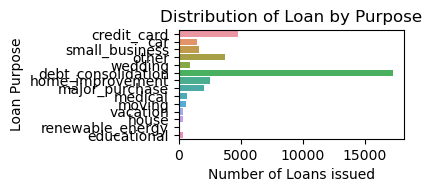

In [86]:
# Distribution of Loan by Purpose
plt.subplot(3,2,2)
sns.countplot(y='purpose', data=loan)
plt.title('Distribution of Loan by Purpose')
plt.xlabel("Number of Loans issued")
plt.ylabel("Loan Purpose")

Text(0, 0.5, 'Number of Loans issued')

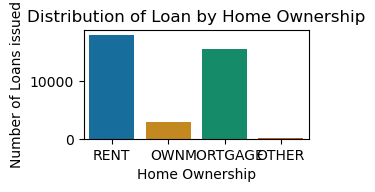

In [89]:
# Distribution of Loan by Home Ownership
plt.subplot(3,2,4)
sns.countplot(x='home_ownership', data=loan)
plt.title('Distribution of Loan by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

Text(0, 0.5, 'Number of Loans issued')

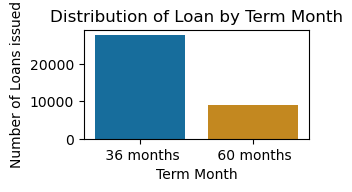

In [91]:
# Distribution of Loan by Term Month
plt.subplot(3,2,5)
sns.countplot(x='term', data=loan)
plt.title('Distribution of Loan by Term Month')
plt.xlabel("Term Month")
plt.ylabel("Number of Loans issued")

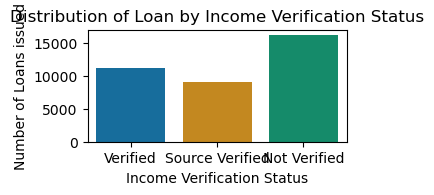

In [94]:
# Distribution of Loan by Income Verification Status
plt.subplot(3,2,6)
sns.countplot(x='verification_status', data=loan)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")


### observation
1. 85 % are in fully paid status.
2. there are more applicants from debt consolidation
3. There are more applicants from rented and mortgage
4. More number of loans are with 36 month term
5. More number loans income verfication status is not verified. 
    

In [95]:
# univarite analysis on ordered categorical variables


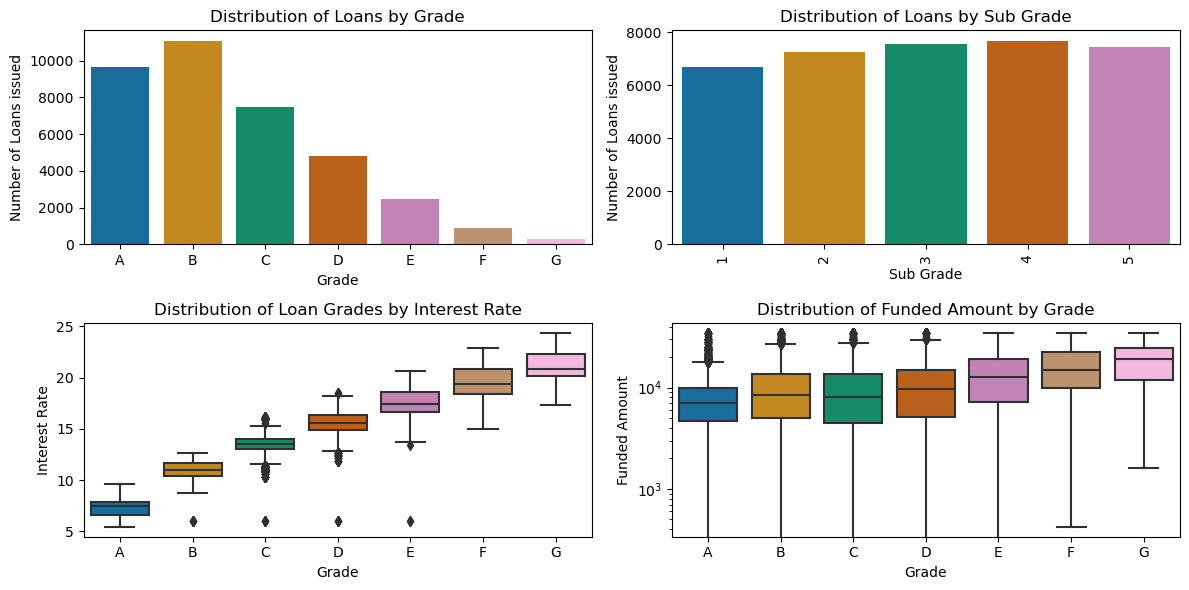

In [97]:
# Distribution of Loans by Grade and Sub-Grade
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,2,1)
sns.countplot( x="grade", data=loan,order = np.sort(loan['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(2,2,2)
sns.countplot( x="sub_grade", data=loan, order = np.sort(loan['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)


# Distribution of Loan Grades by Interest Rate
plt.subplot(2,2,3)
sns.boxplot(x="grade", y="int_rate", data=loan, order = np.sort(loan['grade'].unique()))
plt.title('Distribution of Loan Grades by Interest Rate')
plt.xlabel("Grade")
plt.ylabel("Interest Rate")

# Distribution of Funded Amount by Grade
plt.subplot(2,2,4)
sns.boxplot(x="grade", y="funded_amnt_inv" , data=loan, order = np.sort(loan['grade'].unique()))
plt.title('Distribution of Funded Amount by Grade')
plt.xlabel("Grade")
plt.ylabel("Funded Amount")
plt.yscale('log')

# To adjust spacing between subplots
plt.tight_layout()

plt.show()

Observations:
1.  more number of loans were from B,A and C grade's and least from G grade.
2. From 3rd plot, it shows that A,B,C grade loans have less interest rate and E,F,G have high interest rate.
3. From 4rt plot, it shows that there are high funded amount in A,B,C and D grades

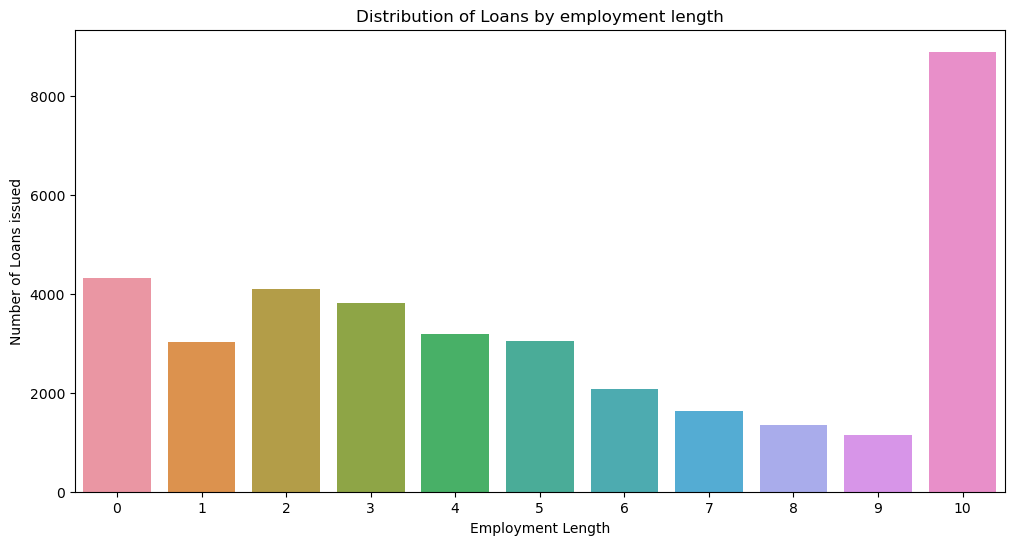

In [98]:
# Distribution of Loans by employment length
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=loan)
plt.title('Distribution of Loans by employment length')
plt.xlabel("Employment Length")
plt.ylabel("Number of Loans issued")
plt.show()

Observation:

The majority of borrowers have been employed for at least 10 years.

# Bivariate Analysis

In [99]:
# plotting columns open_acc,revol_util,total_acc,annual_inc with loan_status=charged Off

<Axes: xlabel='open_acc', ylabel='count'>

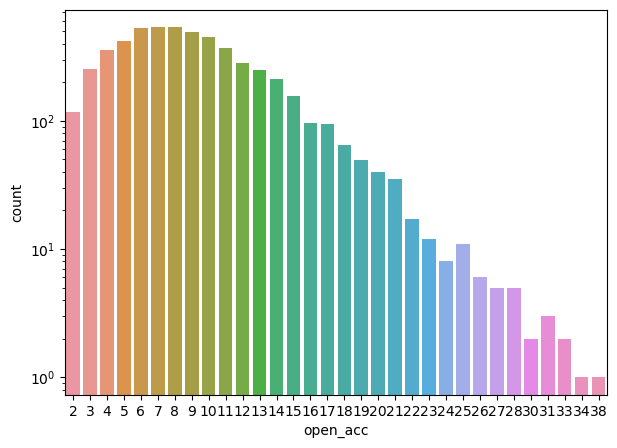

In [102]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc', data=loan[loan.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util', ylabel='count'>

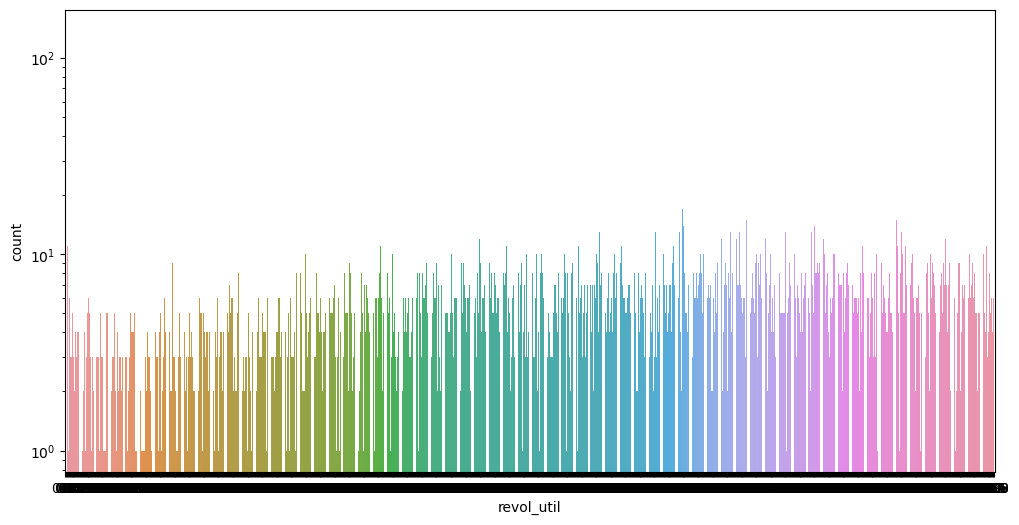

In [108]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set_yscale('log')
sns.countplot(x='revol_util', data=loan[loan.loan_status == 'Charged Off'])

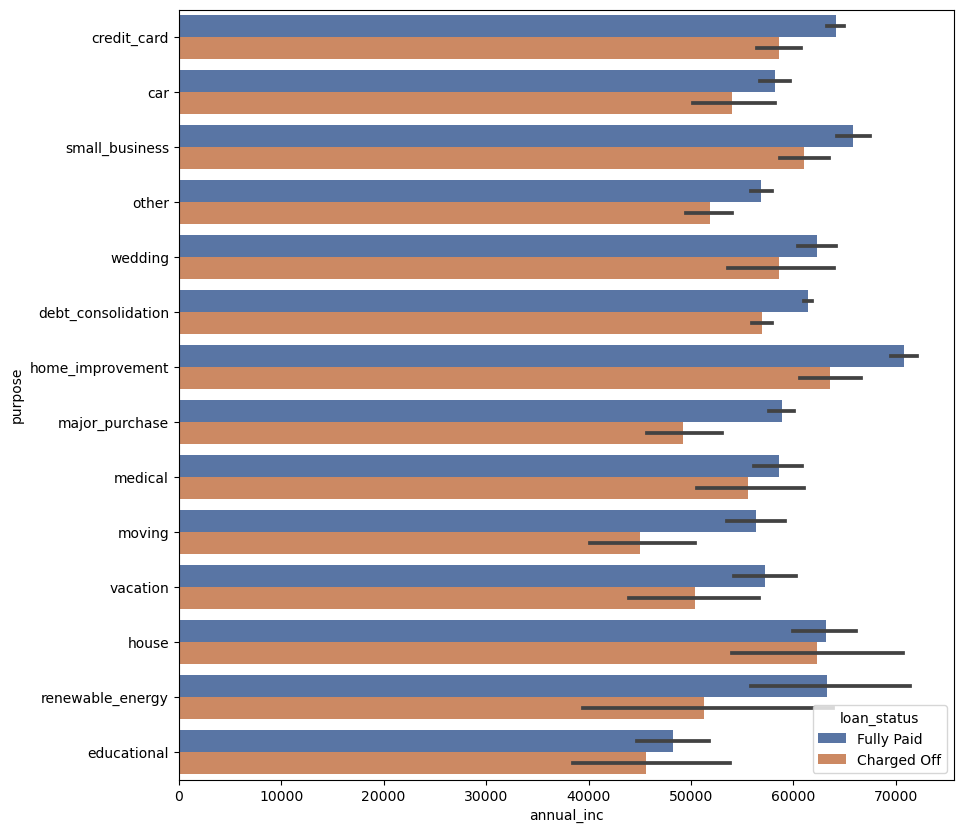

In [115]:
# Annual income vs loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

observation:
Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_business

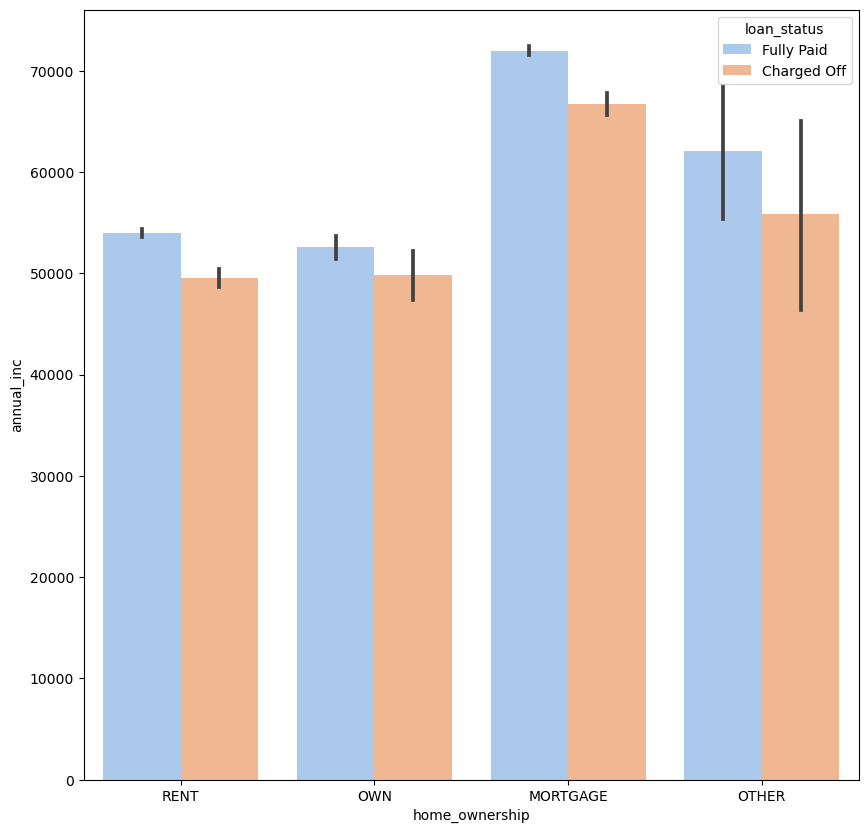

In [117]:
# Annual income vs home ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

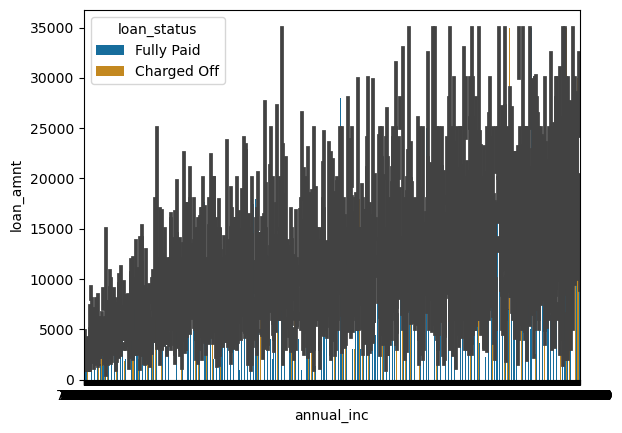

In [120]:
#Annual Income vs Loan amount
sns.barplot(x = "annual_inc", y = "loan_amnt", hue = 'loan_status', data = loan)

In [122]:
column_numerical = loan.select_dtypes(include=np.number).columns.tolist()
print(column_numerical)

['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc']


<Figure size 6000x6000 with 0 Axes>

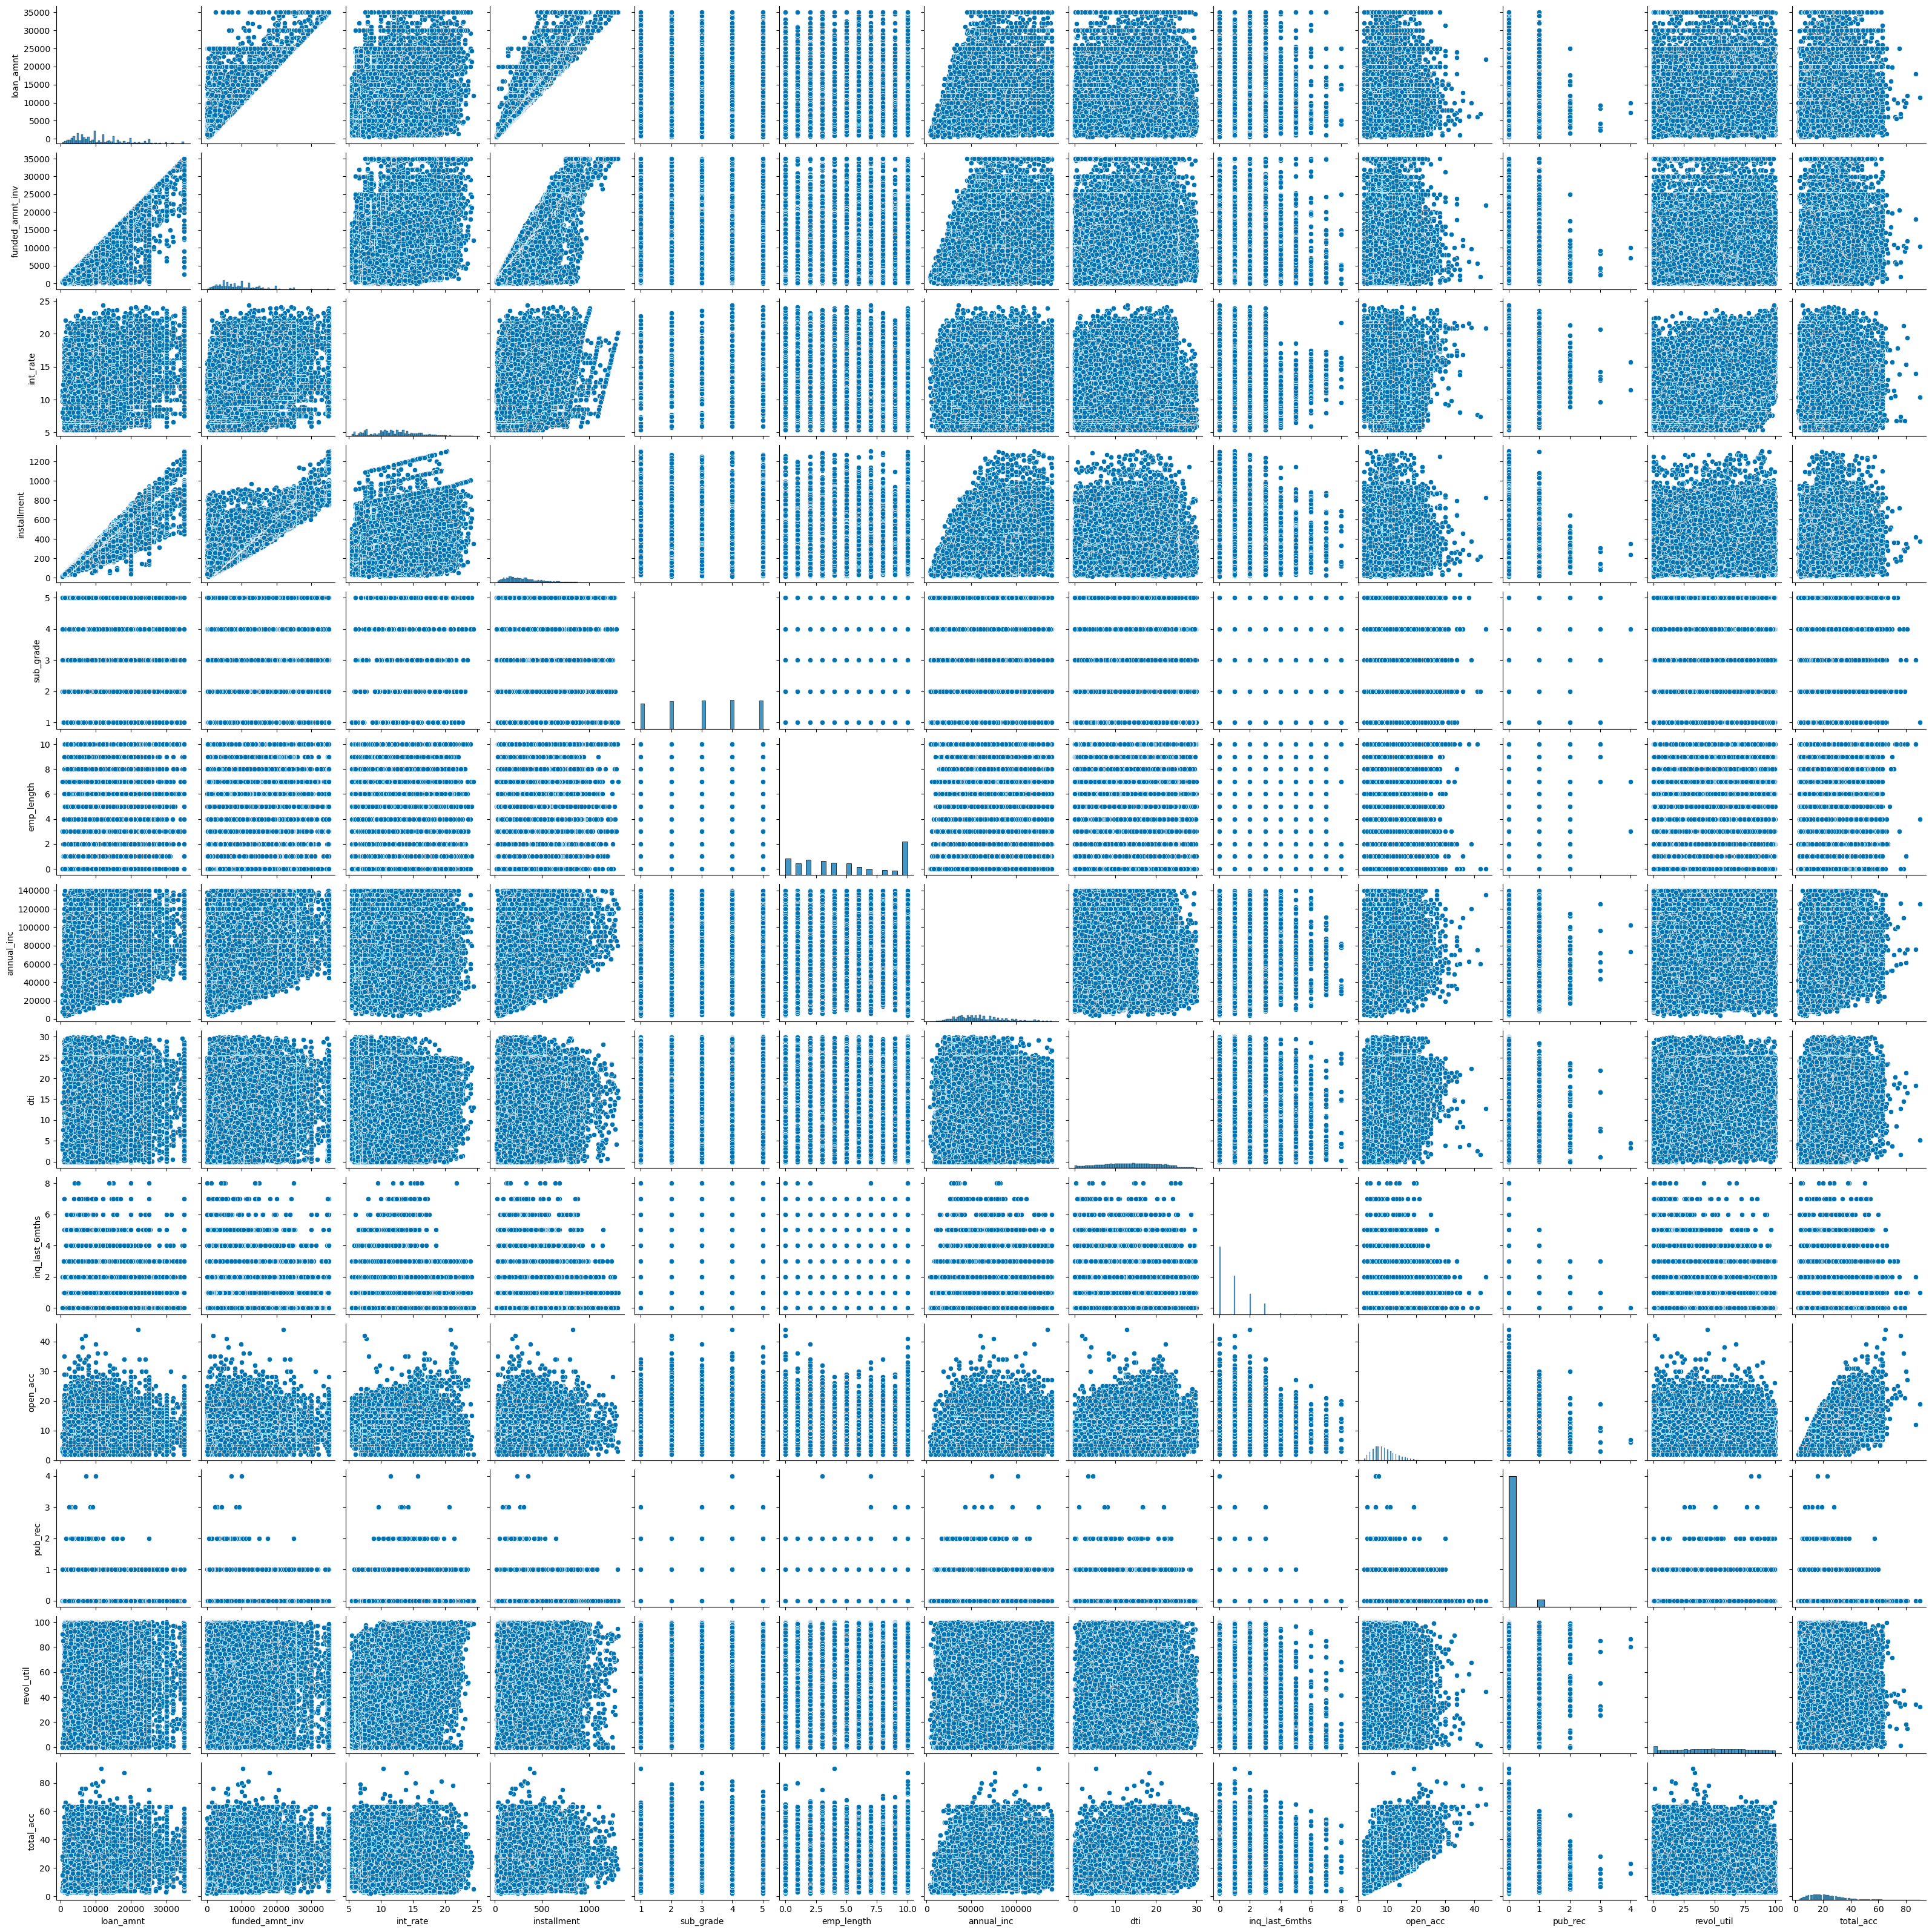

In [126]:
# Create pair plot
plt.figure(figsize=(60, 60))
sns.pairplot(loan[column_numerical])
plt.show()

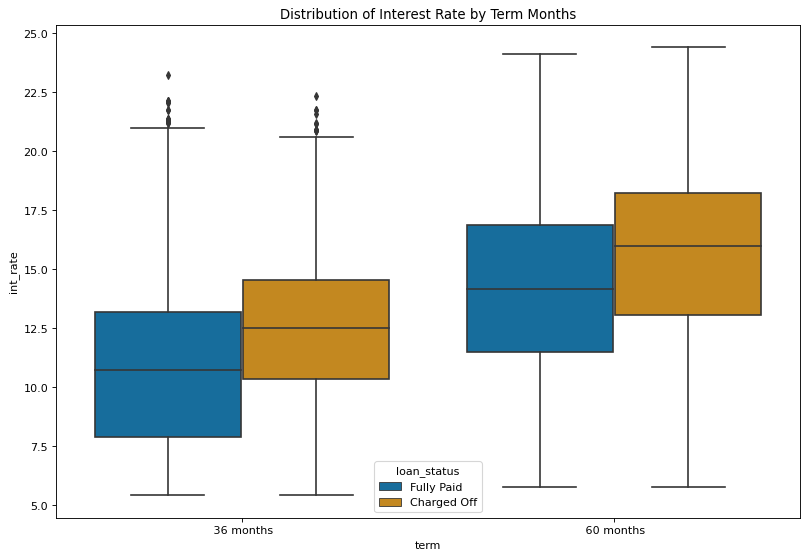

In [129]:
# Interest Rate vs Term Months by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="term", y='int_rate', hue='loan_status',  data=loan)
plt.title('Distribution of Interest Rate by Term Months')
plt.show()

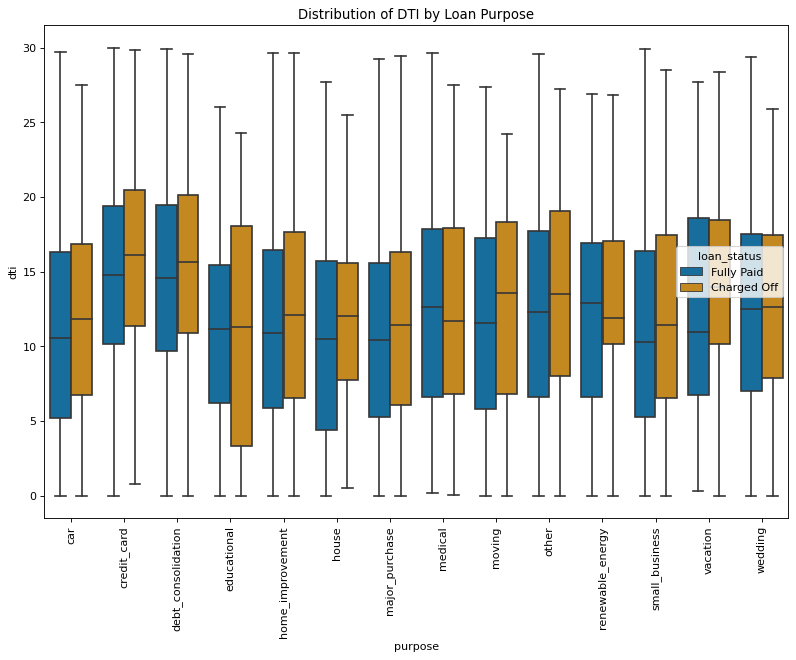

In [130]:
# DTI vs Loan Purpose by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="purpose", y='dti', hue='loan_status', data=loan, order=np.sort(loan['purpose'].unique()))
plt.title('Distribution of DTI by Loan Purpose')
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='total_acc', ylabel='count'>

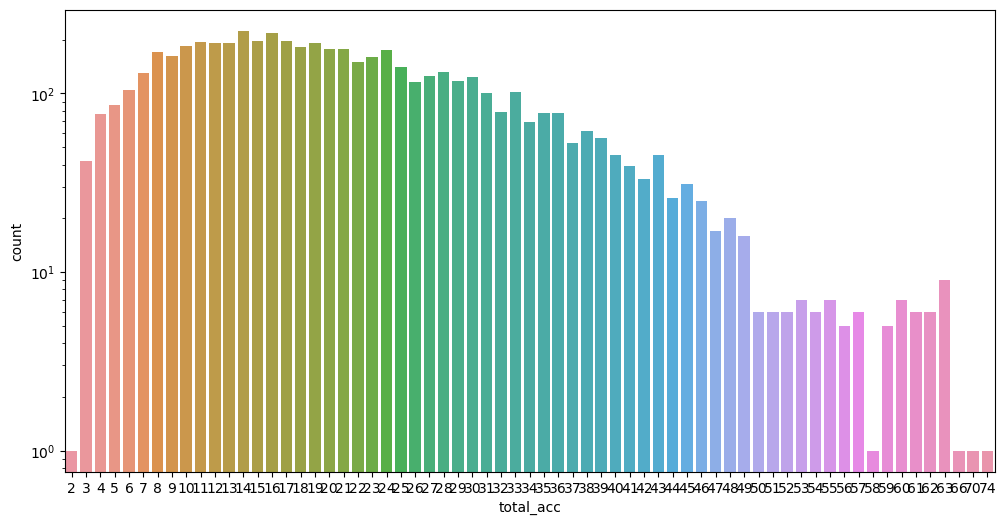

In [107]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set_yscale('log')
sns.countplot(x='total_acc', data=loan[loan.loan_status == 'Charged Off'])

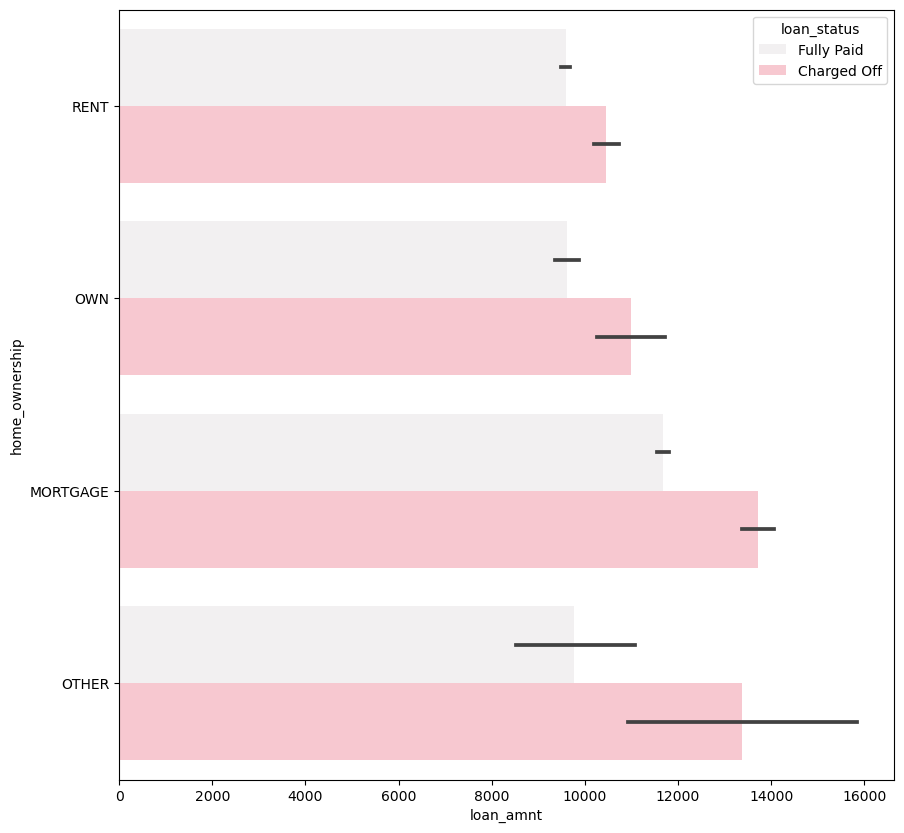

In [137]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='home_ownership', hue ='loan_status',color='pink')
plt.show()

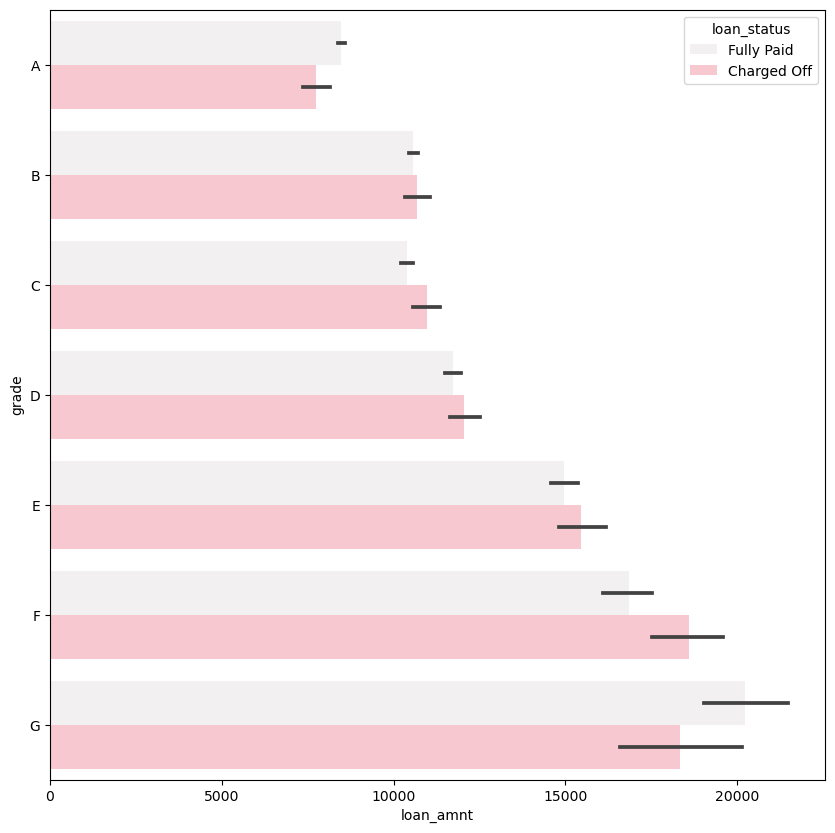

In [138]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='grade', hue ='loan_status',color='pink', order=['A','B','C','D','E','F','G'])
plt.show()

Observation:
1. Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_business
2. The 60 months term loans have more interest rate. 
3. here are more defaulters in both 36, 60 month terms because of high interest rates.
4. Almost in all categories of purpose, defaulter's DTI is high than fully paid borrowers.



# Loan Defaulters

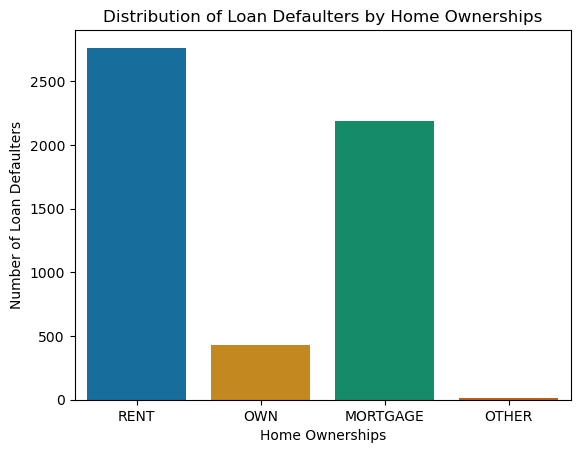

home_ownership
MORTGAGE    2190
OTHER         17
OWN          432
RENT        2763
Name: home_ownership, dtype: int64


In [109]:
# Distribution of Loan Defaulters by Home Ownerships
sns.countplot(x='home_ownership',  data=loan[loan['loan_status']=='Charged Off'])
plt.title('Distribution of Loan Defaulters by Home Ownerships')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership'])['home_ownership'].count())

observation: It shows there are more defaulters in RENT and MORTGAGE. let's check it in granular level.

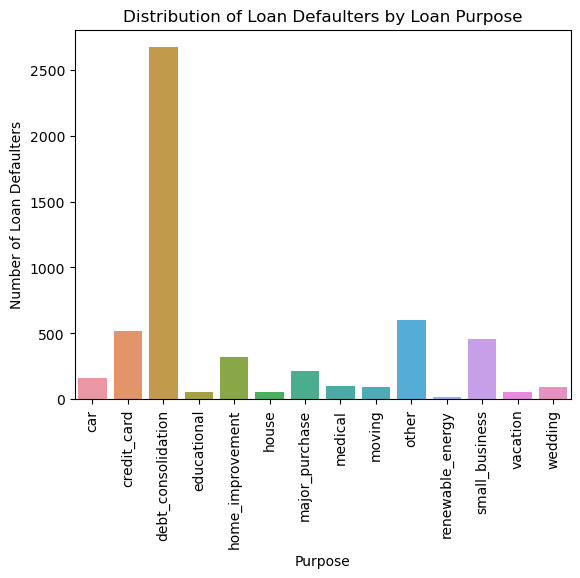

purpose
car                    158
credit_card            518
debt_consolidation    2672
educational             54
home_improvement       319
house                   55
major_purchase         216
medical                103
moving                  90
other                  601
renewable_energy        18
small_business         454
vacation                52
wedding                 92
Name: purpose, dtype: int64


In [110]:
#Distribution of Loan Defaulters by Loan Purpose
sns.countplot(x='purpose',  data=loan[loan['loan_status']=='Charged Off'], order=np.sort(loan['purpose'].unique()))
plt.title('Distribution of Loan Defaulters by Loan Purpose')
plt.xlabel("Purpose")
plt.ylabel("Number of Loan Defaulters")
# To rotate axis text
plt.xticks(rotation=90)
plt.show()


print (loan[loan['loan_status']=='Charged Off'].groupby(['purpose'])['purpose'].count())

Observation:

There are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'. 

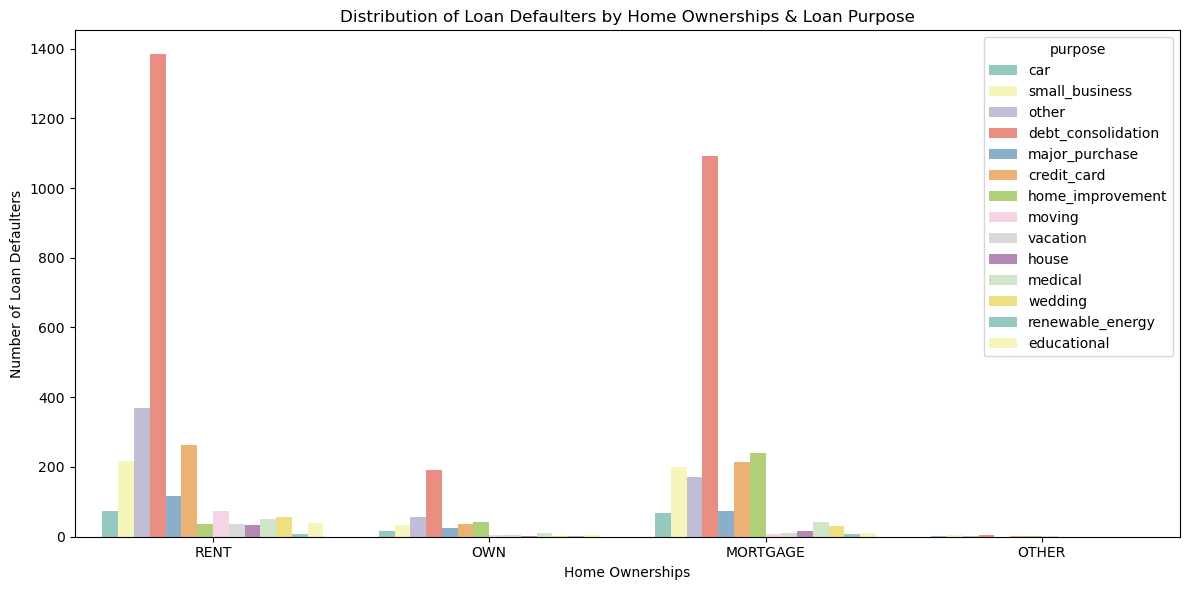

home_ownership  purpose           
MORTGAGE        car                     69
                credit_card            215
                debt_consolidation    1091
                educational             11
                home_improvement       240
                house                   17
                major_purchase          73
                medical                 41
                moving                   8
                other                  172
                renewable_energy         9
                small_business         200
                vacation                12
                wedding                 32
OTHER           car                      1
                credit_card              2
                debt_consolidation       6
                home_improvement         1
                moving                   1
                other                    2
                small_business           4
OWN             car                     15
                cre

In [111]:

# Distribution of Loan Defaulters by Home Ownerships & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership', hue='purpose', data=loan[loan['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Home Ownerships & Loan Purpose')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership','purpose'])['home_ownership'].count())

Observation:

From RENT category, there are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'.

From MORTGAGE category, there are more defaulters from 'debt_consolidation','home_improvement', 'credit_card' and 'small_business'.

Overall, one should be carefull with 'debt_consolidation', 'credit_card' and 'small_business' loans when the borrowers dont have own house.




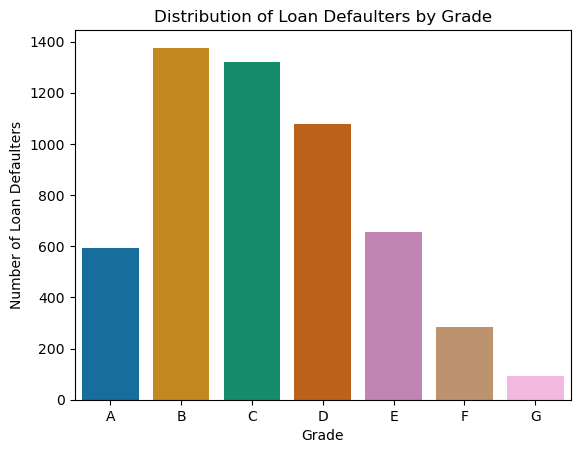

grade
A     593
B    1376
C    1321
D    1077
E     656
F     286
G      93
Name: grade, dtype: int64


In [112]:
#Distribution of Loan Defaulters by Grade
sns.countplot(x='grade',  data=loan[loan['loan_status']=='Charged Off'], order=np.sort(loan['grade'].unique()))
plt.title('Distribution of Loan Defaulters by Grade')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['grade'])['grade'].count())

Observation:

It shows there are more defaulters in B,C and D grades.

Grades F,G(more intereste rate grades) are having less defaulters which is a good indicator.



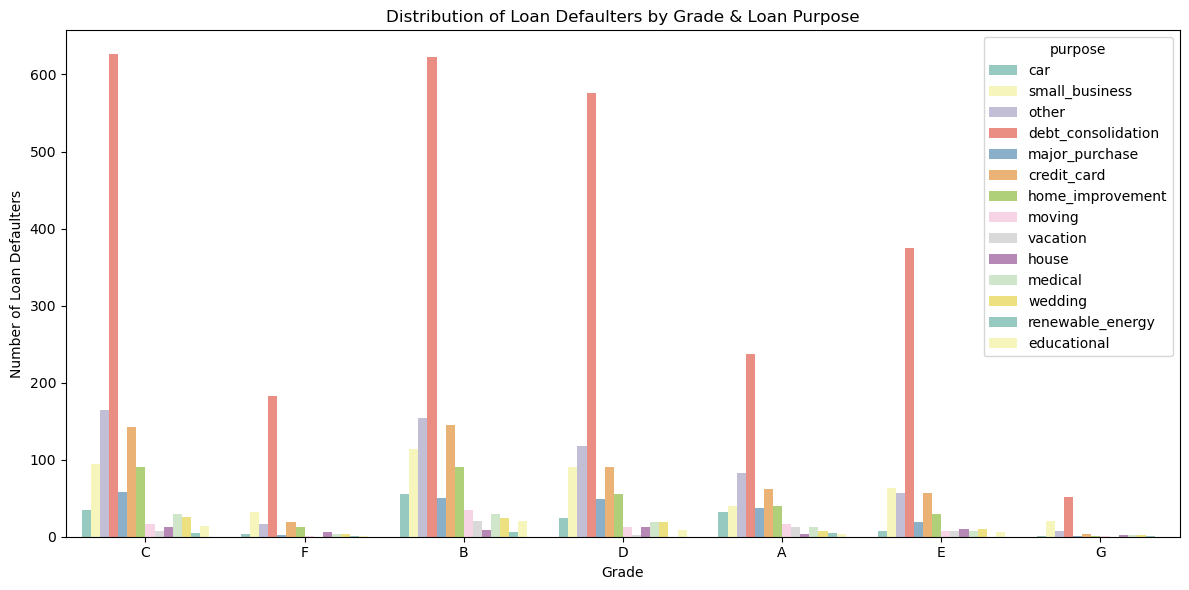

grade  purpose           
A      car                    32
       credit_card            62
       debt_consolidation    237
       educational             4
       home_improvement       40
       house                   3
       major_purchase         37
       medical                12
       moving                 17
       other                  83
       renewable_energy        5
       small_business         40
       vacation               13
       wedding                 8
B      car                    55
       credit_card           145
       debt_consolidation    623
       educational            20
       home_improvement       90
       house                   9
       major_purchase         50
       medical                30
       moving                 35
       other                 154
       renewable_energy        6
       small_business        114
       vacation               21
       wedding                24
C      car                    35
       credit_car

In [114]:
# Distribution of Loan Defaulters by Grade & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='grade', hue='purpose', data=loan[loan['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Grade & Loan Purpose')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['grade','purpose'])['grade'].count())

Observation:

From all grades, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans.

# Final Observations:

### From Univariate:
1. We can see that 85 % are in fully paid status.
2. We can see there are more applicants from debt consolidation
3. There are more applicants from rented and mortgage.
4. More number of loans are with 36 month term.
5. There are More number loans income verfication status is not verified.
6. There are more number of loans were from B,A and C grade's and least from G grade.
7. From the graphs we can see that A,B,C grade loans have less interest rate and E,F,G have high interest rate.
8. From the graphs we can see that there are high funded amount in A,B,C and D grades.
9. We also see that majority of borrowers have been employed for at least 10 years.
10. There is a huge number of charged off loans in 2011
11. In December month a huge number of loans are issued, probably because of Chritmas time

### From Bivariate Anaysis: 

10. From the Bivariate Analysis, we can that 'Applicants' with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_business
11. We can dereive that that 60 months term loans have more interest rate.
12. There are more defaulters in both 36, 60 month terms because of high interest rates.
13. Almost in all categories of purpose, defaulter's DTI is high than fully paid borrowers.


### Analysis pattern behaviour of loan Defaulters :

14. From loan Defaulters Analysis, we can see that there are more defaulters in RENT and MORTGAGE.
15. Further dig down, we can see of RENT category, we can see there are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'.

16. Further dig down, we can see of MORTGAGE category, there are more defaulters from 'debt_consolidation','home_improvement', 'credit_card' and 'small_business'.

17. Overall, one should be carefull with 'debt_consolidation', 'credit_card' and 'small_business' loans when the borrowers dont have own house.

18. We can also see that there are more defaulters in B,C and D grades.

29. And also Grades F,G(more intereste rate grades) are having less defaulters which is a good indicator.

20. From all grades, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans.
